**Imorting required Python Libraries**

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as xp
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

**Impoting the Data**

In [2]:
data=pd.read_csv('adult.csv')

**Data description**

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

**Age :** It tells the age of the person. From this dirth year of the person can be acquired. It is a continuous column. As it varys from 0-100.

In [7]:
data['age'].dtype

dtype('int64')

In [8]:
data['age'].mean()

38.64358543876172

- It is a continuous Feature
- Average age of the people is 38

**Workclass :** It tells whether a person is engaged in waged or salaried labour, especially in manual-labour occupations and industrial work. It is a categorical feature

In [9]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

- It is a categorical Feature

**fnlwgt :** Final weight. In other words, this is the number of people the census believes. The entry represents.

In [10]:
data['fnlwgt'].dtype

dtype('int64')

In [11]:
data['fnlwgt'].mean()

189664.13459727284

- It is a continuous Feature
- It has an average of 189664

**Eduation :** It is the highest education perused by an individual. It is a categorical Feature

In [12]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [13]:
data['education'].nunique()

16

- It has 16 differnt categories

**Educational-num** It represents the education done by an individual. It is a categorical

In [14]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

In [15]:
data['educational-num'].nunique()

16

- It has 16 categories.

**marital status :** It describe a person's relationship with a significant other.

In [16]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [17]:
data['marital-status'].nunique()

7

- It is a categorical feature with 7 categories.

**occupation :** It represents the job that an individual is doing.

In [18]:
data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [19]:
data['occupation'].nunique()

15

- It is a categorical feature and it has 15 categories.

**relationship :** It tell the relationship of an individdual.

In [20]:
data['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [21]:
data['relationship'].nunique()

6

- It is a categorical feature and has 6 categories in it.

**race :** It tells the race of an individual

In [22]:
data['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [23]:
data['race'].nunique()

5

- It is a categorical and had 5 categories.

**gender :** It represents the gender of an individual. It is a categorical Feature.

In [24]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

- It has two categories Male and Female

**capital-gain :** It refers to an increase in a capital asset's value and is considered to be realized when the asset is sold.

In [25]:
data['capital-gain'].dtype

dtype('int64')

- It is a continuous feature as it may have any value from 0 to $ \infty$

**capital loss :** It is the loss incurred when a capital asset, such as an investment or real estate, decreases in value.

In [26]:
data['capital-loss'].dtype

dtype('int64')

- It is a continuous feature as it may have any value from 0 to $ \infty$

**hours per week :** It tells total hour of work done in a week.

In [27]:
data['hours-per-week'].dtype

dtype('int64')

- It is a count of values.
- so, it is a continuous feature.

**native country :** It is the country where an individual is born.

In [28]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [29]:
data['native-country'].nunique()

42

- It is a categorical fratues.
- People are from 42 differnt countries of origin.

**income :** It is money what an individual or business receives in exchange for providing labor, producing a good or service, or through investing capital.

In [30]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

- It is categorized into two categories. It is a categorical Feature

Now let's Divide all the features according to their type Categorical or continuous Features and convert them accordingly.

In [31]:
actual_categ_cols=['age','fnlwgt''capital-gain', 'capital-loss', 'hours-per-week']
actual_conti_cols=['workclass','education','educational-num','marital-status', 'occupation', 'relationship',
                   'race', 'gender','native-country','income']

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [33]:
categ_cols=[]
conti_cols=[]
for col in data.columns:
    if data[col].dtype==object:
        categ_cols.append(col)
    else:
        conti_cols.append(col)
print('Categorical Features according to type of data',categ_cols,sep="\n")
print()
print('Continuous Features according to type of data',conti_cols,sep="\n")

Categorical Features according to type of data
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

Continuous Features according to type of data
['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


- Actually Educational number is a categorical feature but we have it as continuous feature. It has to be converted into categorical feature.

In [34]:
data['educational-num']=data['educational-num'].astype(object)

After converting now check for it.

In [35]:
categ_cols=[]
conti_cols=[]
for col in data.columns:
    if data[col].dtype==object:
        categ_cols.append(col)
    else:
        conti_cols.append(col)
print('Categorical Features according to type of data',categ_cols,sep="\n")
print()
print('Continuous Features according to type of data',conti_cols,sep="\n")

Categorical Features according to type of data
['workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

Continuous Features according to type of data
['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']


**Discriptive stats**

In [36]:
data.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


- The average age of an individual is 38.
- Most of the people doesnot have captial gain or capital loss.
- On a average an individual works 40 hours a week
- The average fnlweight is 189664.1
- The mininmun age is 17 and maximum is 90.
- the minimumn work in hours per week is 1 and maximum is 99.

In [37]:
data.describe(include=object)

,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,16,7,15,6,5,2,42,2
top,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,15784,22379,6172,19716,41762,32650,43832,37155


- Most of the work class is private.
- most of the people have done HS-graduation.
- Most os them are Married-civ-spouse.Most of them are who are maried are husbands.
- Most of them are employed as prof-specialty.
- More males than females.
- Most of them are from United-States.
- most of them had income <=50K

**Univariate anaysis**  

**Age**

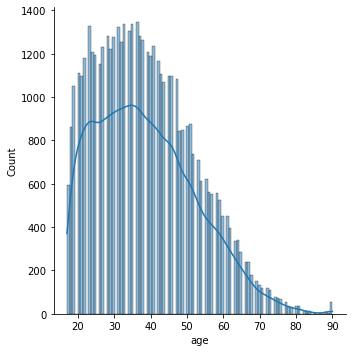

In [38]:
sns.displot(data['age'],kde=True,bins=100)

<AxesSubplot:xlabel='age', ylabel='Count'>

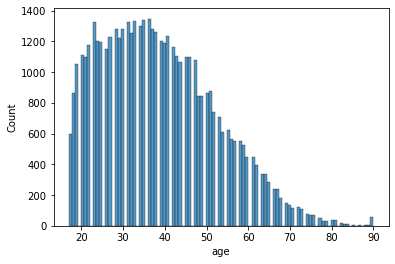

In [39]:
sns.histplot(data['age'],bins=100)

<AxesSubplot:xlabel='age'>

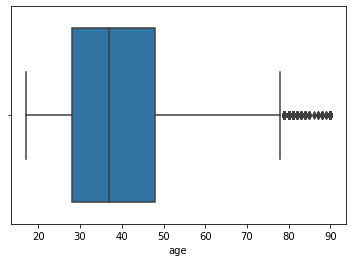

In [40]:
sns.boxplot(x=data['age'])

observations  
- From the box plot it tells it has some outliers but actually they are not considered as outliers as age is in range of 0 to 100.
- It is some what like a log normal distribution but not.
- Most of the people's is in range 25-30

**Work class**

<AxesSubplot:xlabel='workclass', ylabel='count'>

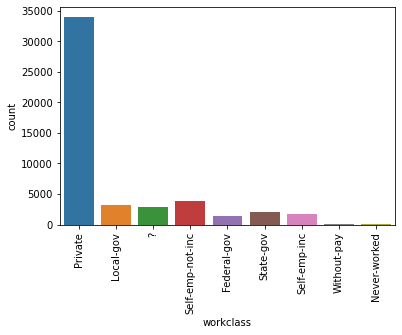

In [41]:
plt.xticks(rotation=90)
sns.countplot(x=data['workclass'])

observation
- Most of the people work in private work calss
- there are some missing values.

**fnlwgt**

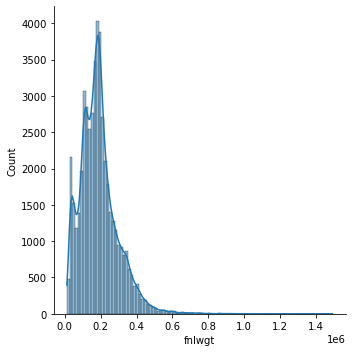

In [42]:
sns.displot(x=data['fnlwgt'],kde=True,bins=100)

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

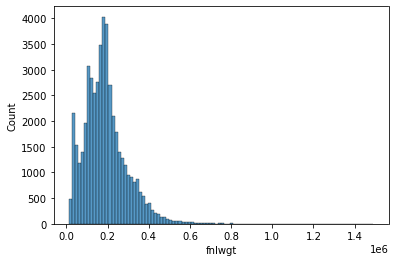

In [43]:
sns.histplot(data['fnlwgt'],bins=100)

<AxesSubplot:xlabel='fnlwgt'>

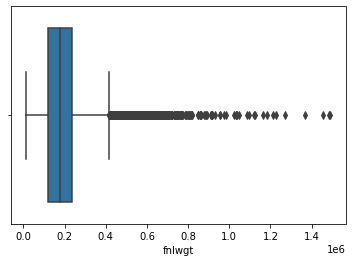

In [44]:
sns.boxplot(x=data['fnlwgt'])

observations
- There are so many outlers.
- Most of thrm are in range of 100K to 300K
- Can't relate to any famous distributions.

**Education**

<AxesSubplot:xlabel='education', ylabel='count'>

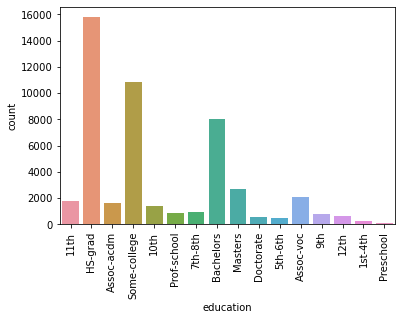

In [45]:
plt.xticks(rotation=90)
sns.countplot(x=data['education'])

observations
- Most of the people have completed HS-graduation.
- Least is of Preschool. 
- Most of them are educated.

**educational-num**

<AxesSubplot:xlabel='educational-num', ylabel='count'>

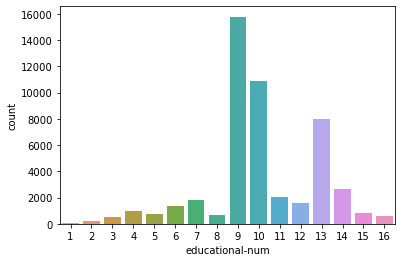

In [46]:
sns.countplot(x=data['educational-num'])

observations
- most of them have education number as 9
- It is like Labled encoded feature of education
- Dublicate of education feature

**Material Status**

<AxesSubplot:xlabel='marital-status', ylabel='count'>

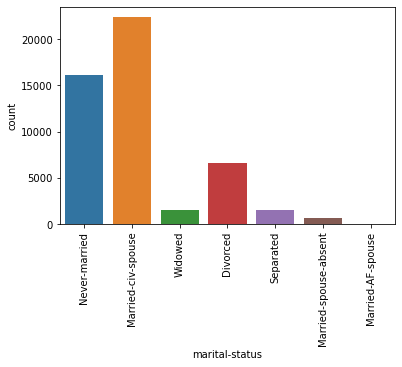

In [47]:
plt.xticks(rotation=90)
sns.countplot(x=data['marital-status'])

observations
- Most of them are married civilian spouse and the most least are maried-Armedforces-spouse.

**occupation**

<AxesSubplot:xlabel='occupation', ylabel='count'>

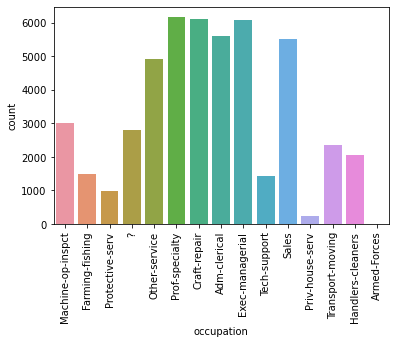

In [48]:
plt.xticks(rotation=90)
sns.countplot(x=data['occupation'])

observations
- Most of the people work as prof speciality and very least of them work in Armed Forces
- crack repair and Teh-suppourt are very near to the count of prof speciality.

**relationship**

<AxesSubplot:xlabel='relationship', ylabel='count'>

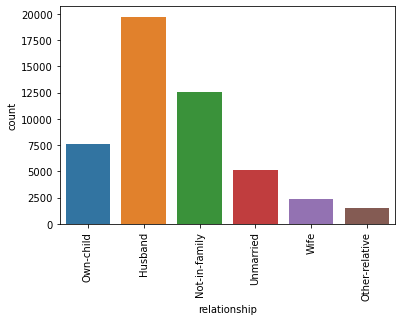

In [49]:
plt.xticks(rotation=90)
sns.countplot(x=data['relationship'])

observatons
- Most of the people are married men(Husbands).

**race**

<AxesSubplot:xlabel='race', ylabel='count'>

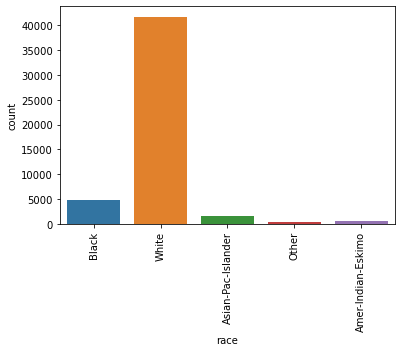

In [50]:
plt.xticks(rotation=90)
sns.countplot(x=data['race'])

observations
- Most of the people are of White race.

**gender**

<AxesSubplot:xlabel='gender', ylabel='count'>

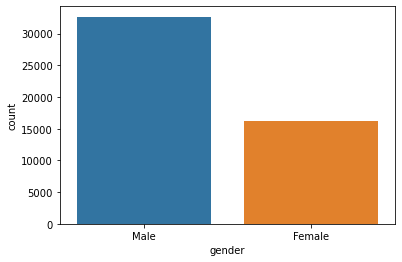

In [51]:
sns.countplot(x=data['gender'])

observations
- Most of the people are Males.

**capital-gain**

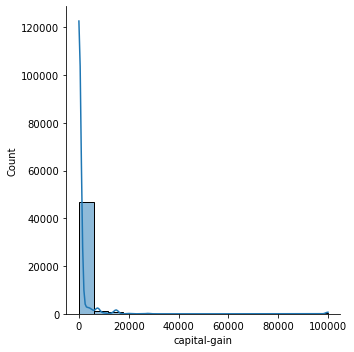

In [52]:
sns.displot(x=data['capital-gain'],kde=True)

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

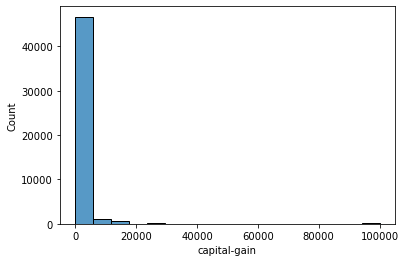

In [53]:
sns.histplot(x=data['capital-gain'])

<AxesSubplot:xlabel='capital-gain'>

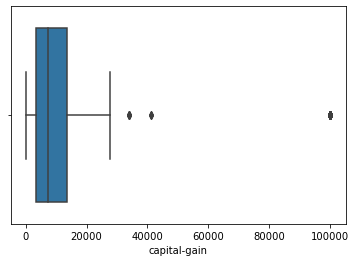

In [54]:
sns.boxplot(x=data[data['capital-gain']!=0]['capital-gain'])

observations
- Most of the people don't have Capital gain
- When comparing outliers if we consider the only one with capital gain (i.e !=0) there are only few outliers

**capital-loss**

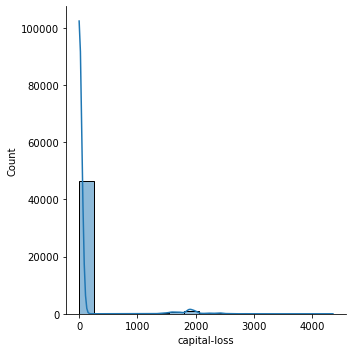

In [55]:
sns.displot(x=data['capital-loss'],kde=True)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

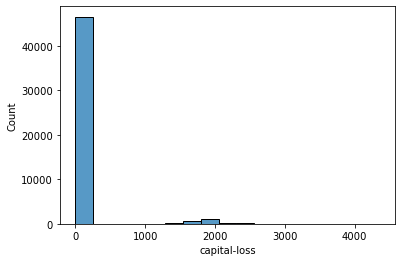

In [56]:
sns.histplot(x=data['capital-loss'])

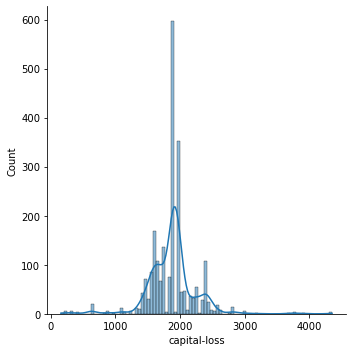

In [57]:
sns.displot(x=data[data['capital-loss']!=0]['capital-loss'],kde=True)

<AxesSubplot:xlabel='capital-loss'>

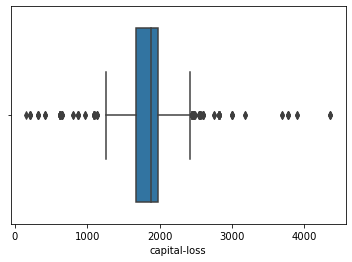

In [58]:
sns.boxplot(x=data[data['capital-loss']!=0]['capital-loss'])

observations
- Most of people dont have capital-loss.
- when only people with loss is considered there are many outliers

**hours per week**

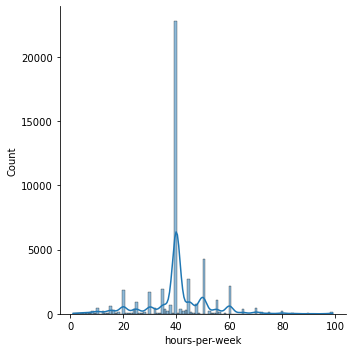

In [59]:
sns.displot(x=data['hours-per-week'],kde=True,bins=100)

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

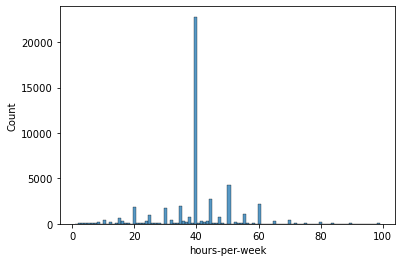

In [60]:
sns.histplot(x=data['hours-per-week'],bins=100)

<AxesSubplot:xlabel='hours-per-week'>

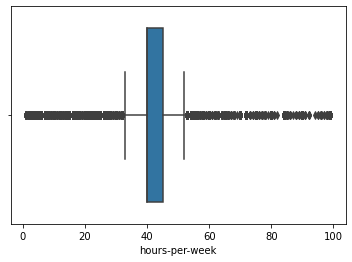

In [61]:
sns.boxplot(x=data['hours-per-week'])

observations
- Most of the people work 40 hours per week.
- There are so many outliers

**native-country**

<AxesSubplot:xlabel='native-country', ylabel='count'>

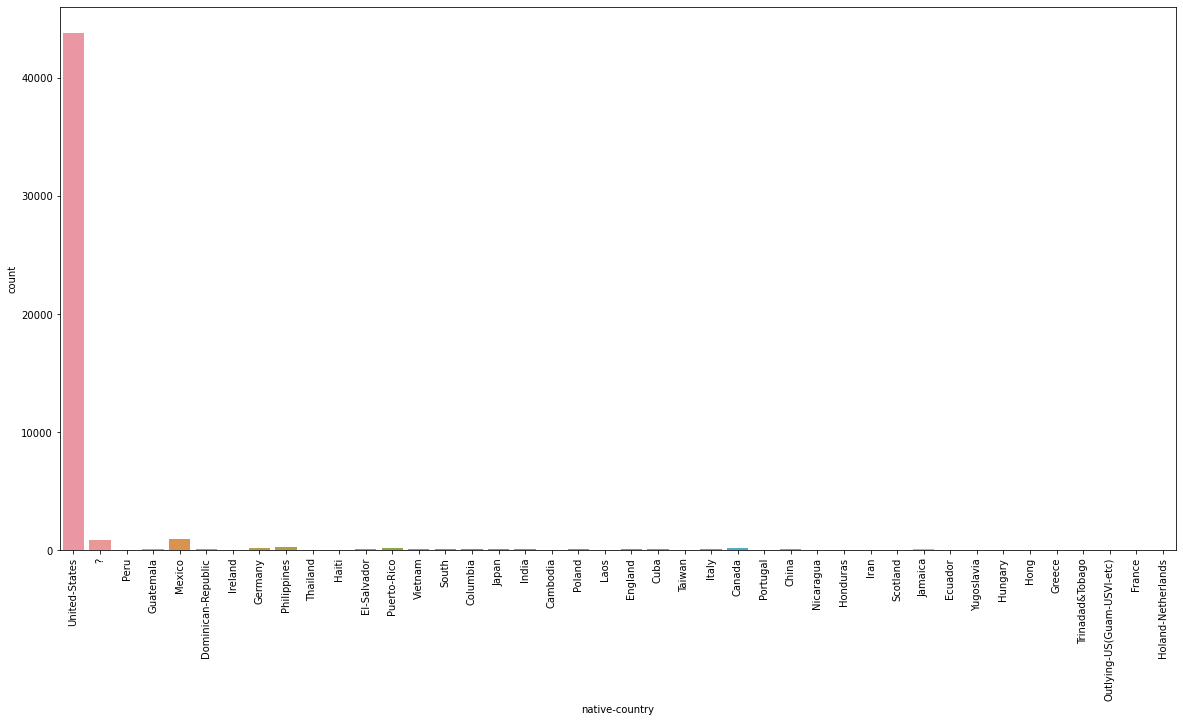

In [62]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x=data['native-country'])

observations
- Most of the people are from united states 80% of people
- Very few 20% are from other countries.

**income**

<AxesSubplot:xlabel='income', ylabel='count'>

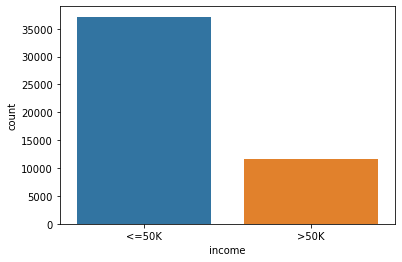

In [63]:
sns.countplot(x=data['income'])

observations
- Most of the people have income <=50K

**BiVariate Analysis**

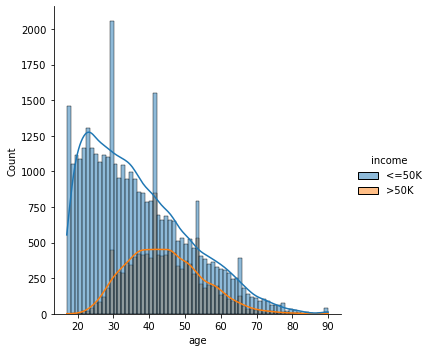

In [64]:
sns.displot(data=data,x='age',hue='income',kde=True)

observation
- Most of the people with income <=50k are at age 30
- most of the people with income >50K are at age 40-45

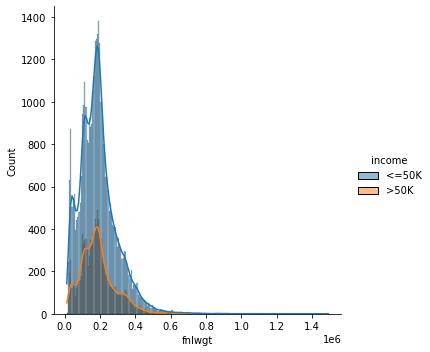

In [65]:
sns.displot(data=data,x='fnlwgt',kde=True,hue='income')

observations
- Most of the people whoes income <= 50k or >50k their final weight is near to 200000.

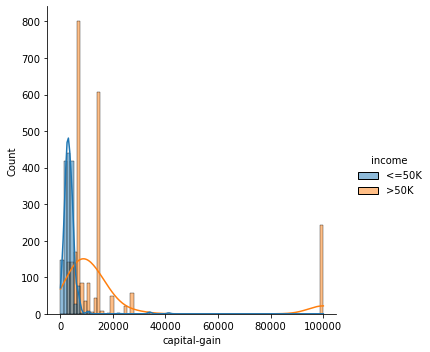

In [66]:
sns.displot(x=data[data['capital-gain']!=0]['capital-gain'],kde=True,hue=data['income'])

observations
- most of the people have captiral gain of 0-20000. 
- People with income >50k have greater capital gain.

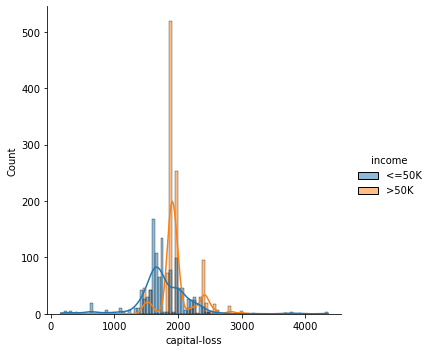

In [67]:
sns.displot(x=data[data['capital-loss']!=0]['capital-loss'],kde=True,hue=data['income'])

observations
- People with income >50k have capital loss of 1500 to 3000
- people with income <=50k have capital loss of 1000-2500

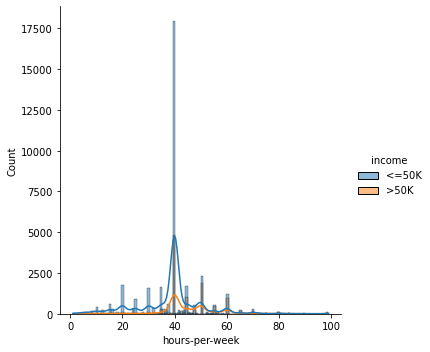

In [68]:
sns.displot(data=data,x='hours-per-week',kde=True,hue='income',bins=100)

observations
- Most of the people work 40 hours per week whther they get income >50k or <=50K.

<AxesSubplot:xlabel='age', ylabel='fnlwgt'>

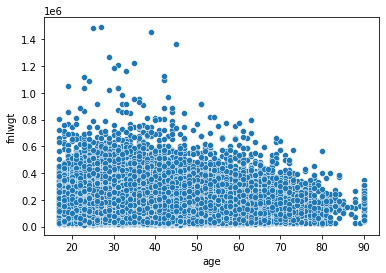

In [69]:
sns.scatterplot(x=data['age'],y=data['fnlwgt'])

obesrvation
- As the age increases the fnlwgt in some cases it increases,some cases it decreases and some cases it remains constant.

<AxesSubplot:xlabel='age', ylabel='capital-gain'>

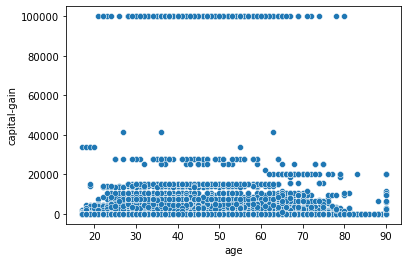

In [70]:
sns.scatterplot(x=data['age'],y=data['capital-gain'])

obesrvation
- As the age increases the capital gain in some cases it increases,some cases it decreases and some cases it remains constant.
- Most of the people don't have capital gain

<AxesSubplot:xlabel='age', ylabel='capital-loss'>

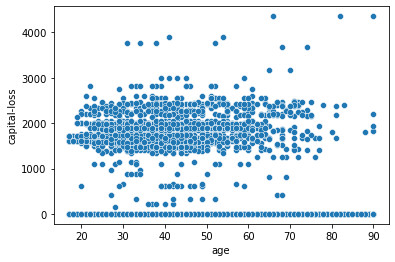

In [71]:
sns.scatterplot(data=data,x='age',y='capital-loss')

obesrvation
- As the age increases the capital loss in some cases it increases,some cases it decreases and some cases it remains constant.
- Most ofthe people don't have capital loss

<AxesSubplot:xlabel='age', ylabel='marital-status'>

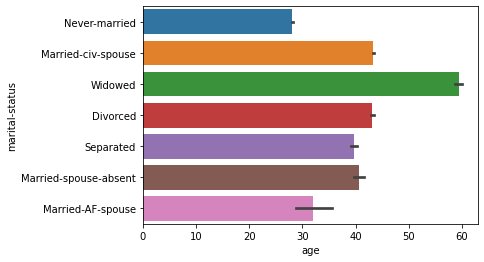

In [72]:
sns.barplot(x=data['age'],y=data['marital-status'])

observations
- Most of married-civilian spouse are at age 40-45.
- Most oa people who are Married-AF-apouse are at age 30-35.
- Mosr of the people who are never married are below age of 30.
- Most of the diveorced prople are at age 40-45.
- Most of the seperated peoplea re at age 30-40.
- Most of the people Married spouse absent are at age 40-45.
- Mist of the Widowed people are at age greater than 60.

<AxesSubplot:xlabel='workclass', ylabel='age'>

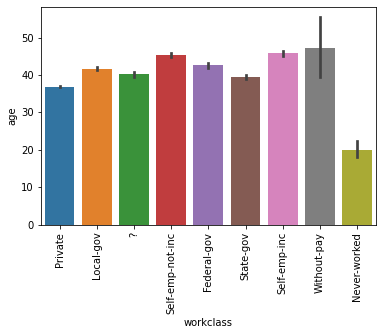

In [73]:
plt.xticks(rotation=90)
sns.barplot(x=data['workclass'],y=data['age'])

observations
- People with age less than 20 have nevere worked
- on average age 30-50 are working.

<AxesSubplot:xlabel='education', ylabel='hours-per-week'>

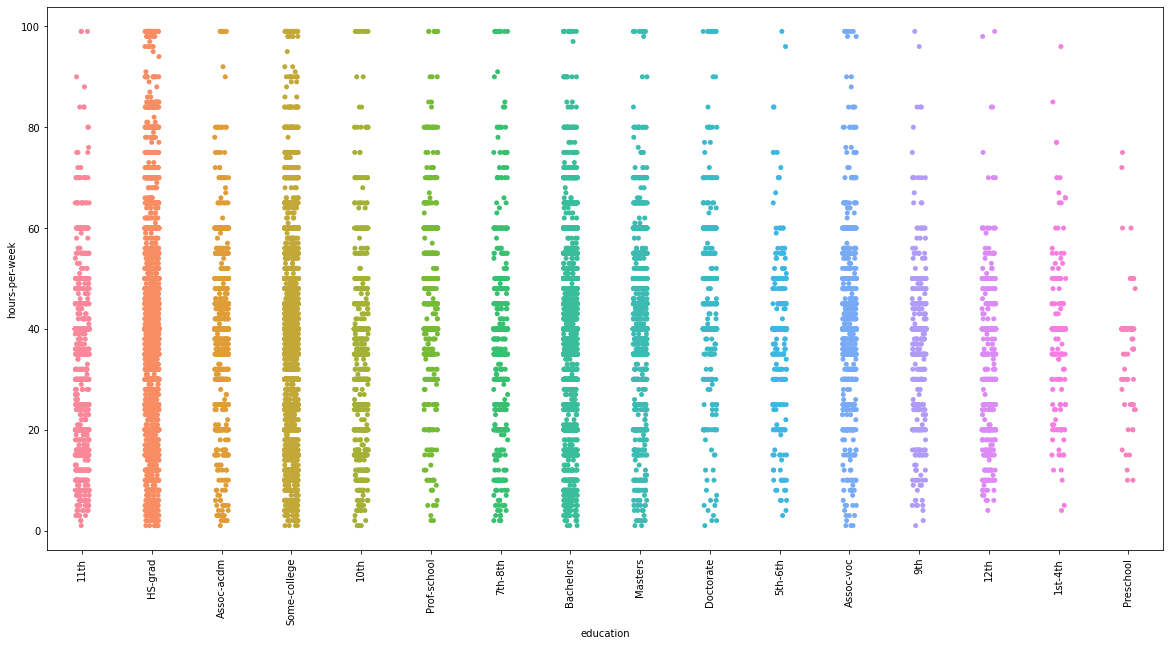

In [74]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.stripplot(x=data['education'],y=data['hours-per-week'])

observation
- Preson with any education maximunn work for 100 hours per week
- Person with any education most of them work 40 hours.

<AxesSubplot:xlabel='gender', ylabel='hours-per-week'>

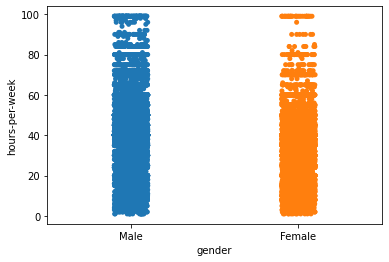

In [75]:
sns.stripplot(x=data['gender'],y=data['hours-per-week'])

- Males woirk more than Feamles

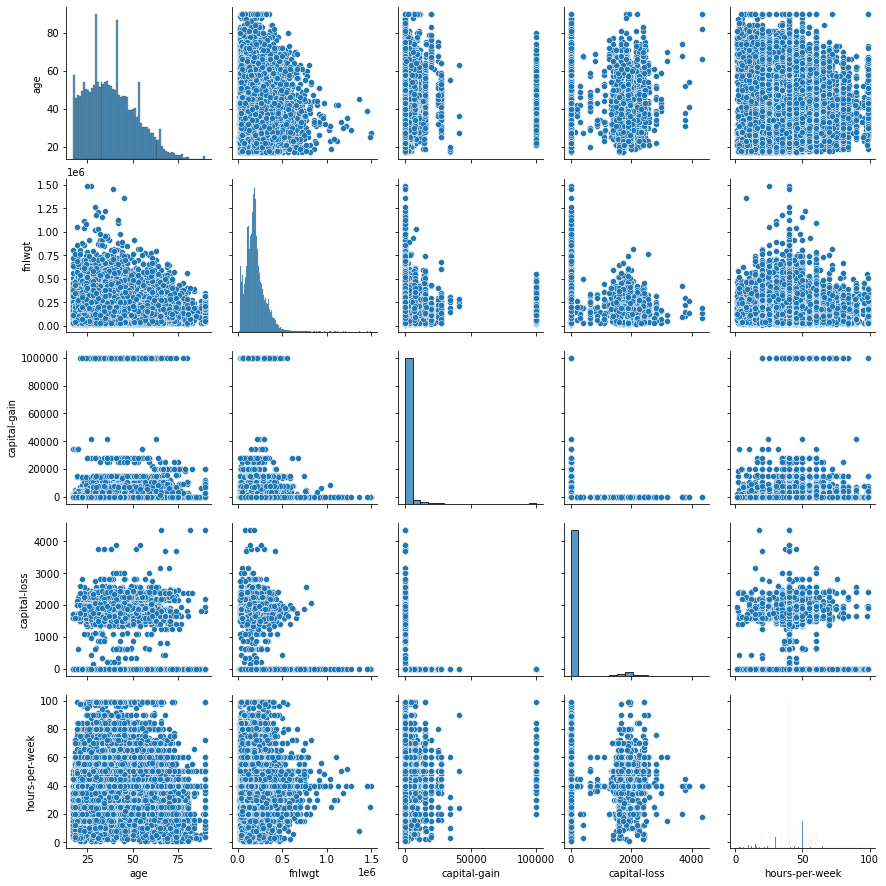

In [76]:
sns.pairplot(data[conti_cols])

<AxesSubplot:>

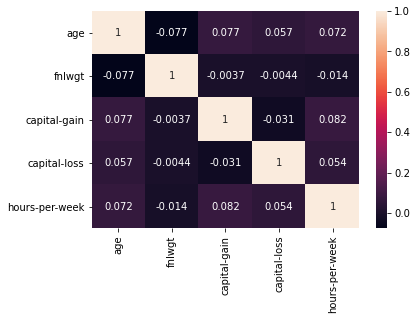

In [77]:
plt.xticks(rotation=90)
sns.heatmap(data[conti_cols].corr(),annot=True)

observations
-There is correlation between the Features

<AxesSubplot:xlabel='native-country', ylabel='count'>

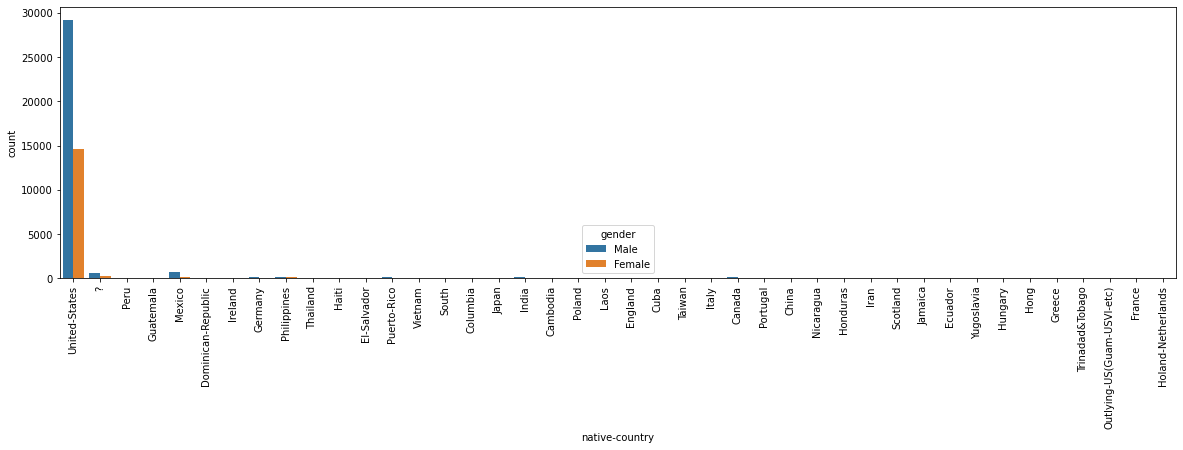

In [78]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(x=data['native-country'],hue=data['gender'])

observation
- In every country there are morw males than females.

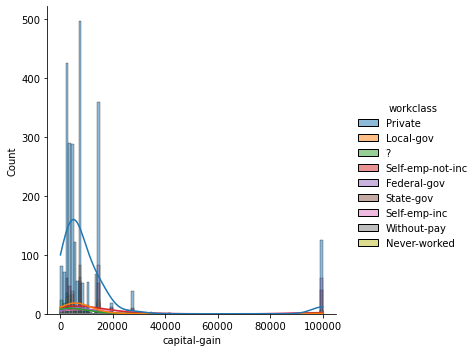

In [79]:
sns.displot(kde=True,x=data[data['capital-gain']!=0]['capital-gain'],hue=data['workclass'],bins=100)

observations
- Capital gain is more for private, self-emp-inc people

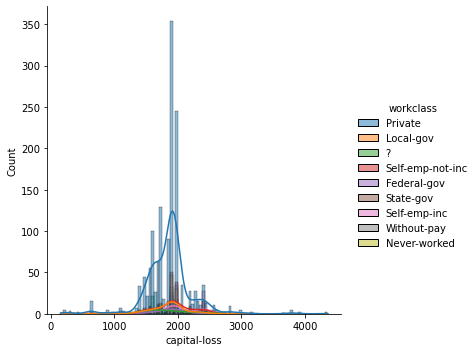

In [80]:
sns.displot(kde=True,x=data[data['capital-loss']!=0]['capital-loss'],hue=data['workclass'],bins=100)

observations
- Capital loss is more for private, self-emp-inc people

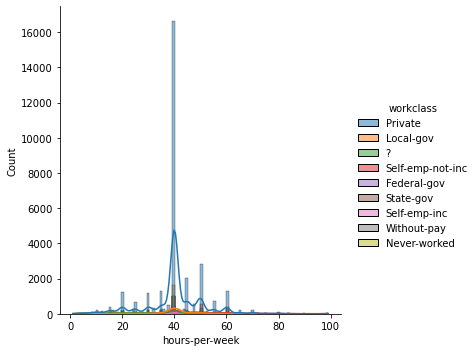

In [81]:
sns.displot(kde=True,x=data['hours-per-week'],hue=data['workclass'],bins=100)

observation
- Most of the People who work in private work class work more than others.

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

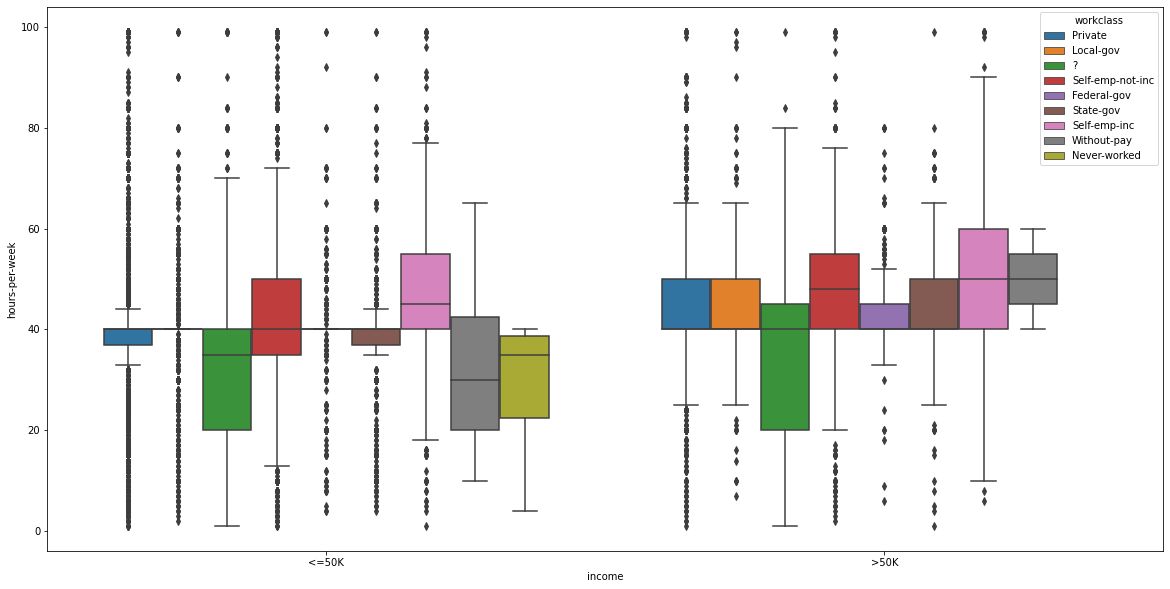

In [82]:
plt.figure(figsize=(20,10))
sns.boxplot(y=data['hours-per-week'],x=data['income'],hue=data['workclass'])

observations
- Most of the people work 40 hours per week for income >50k if they work in except Without pay and neverworked

<AxesSubplot:xlabel='income', ylabel='capital-gain'>

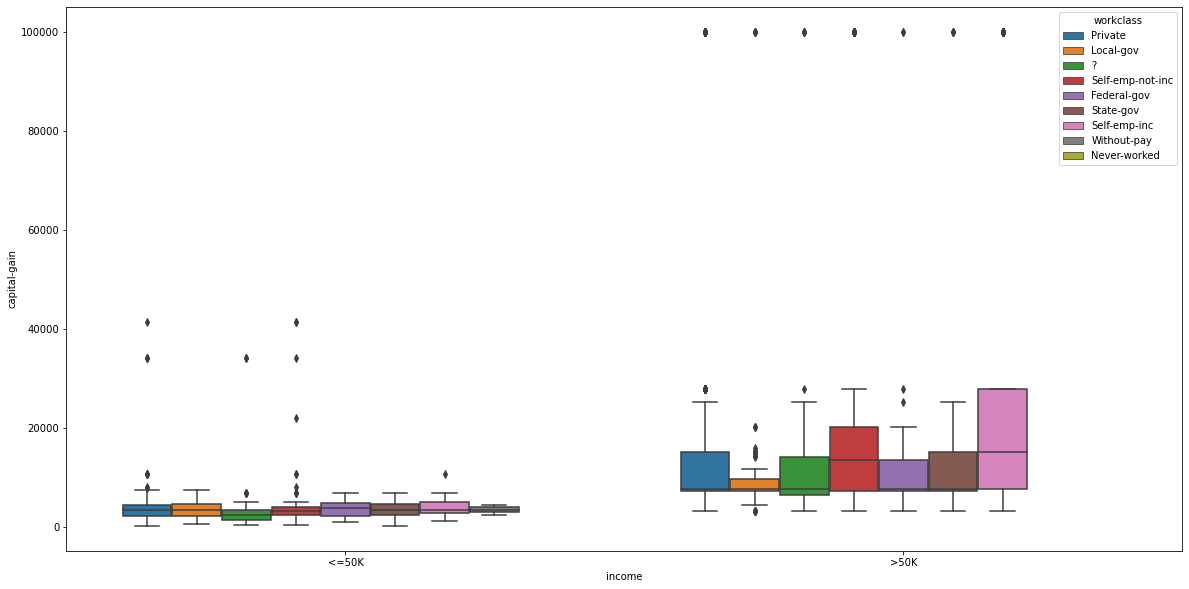

In [83]:
plt.figure(figsize=(20,10))
sns.boxplot(y=data[data['capital-gain']!=0]['capital-gain'],x=data['income'],hue=data['workclass'])

<AxesSubplot:xlabel='income', ylabel='capital-loss'>

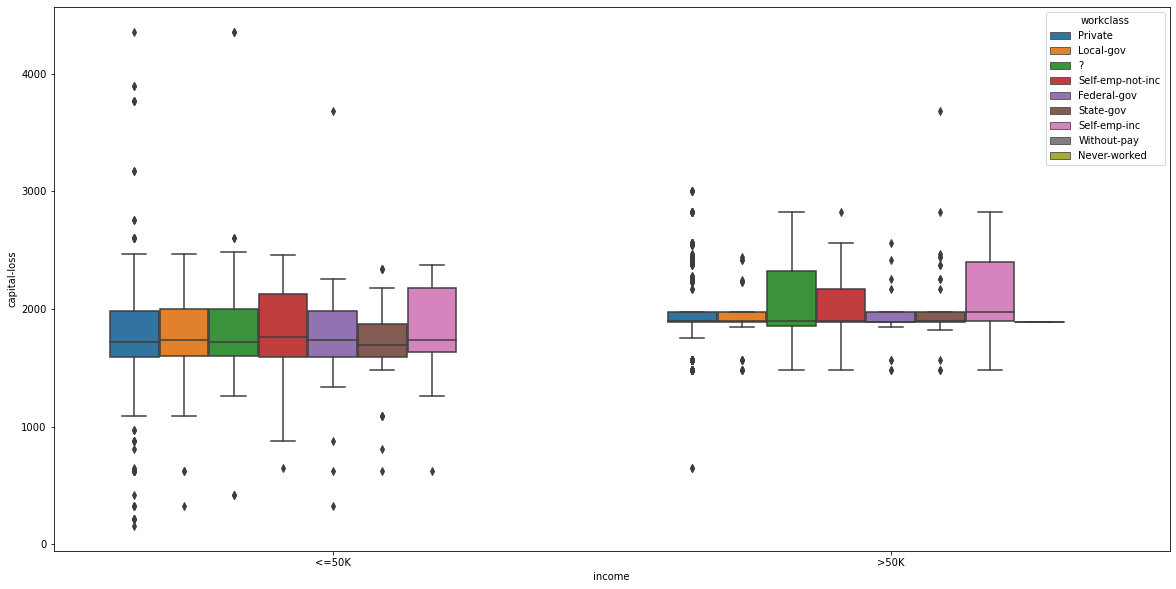

In [84]:
plt.figure(figsize=(20,10))
sns.boxplot(y=data[data['capital-loss']!=0]['capital-loss'],x=data['income'],hue=data['workclass'])

<AxesSubplot:xlabel='gender', ylabel='Count'>

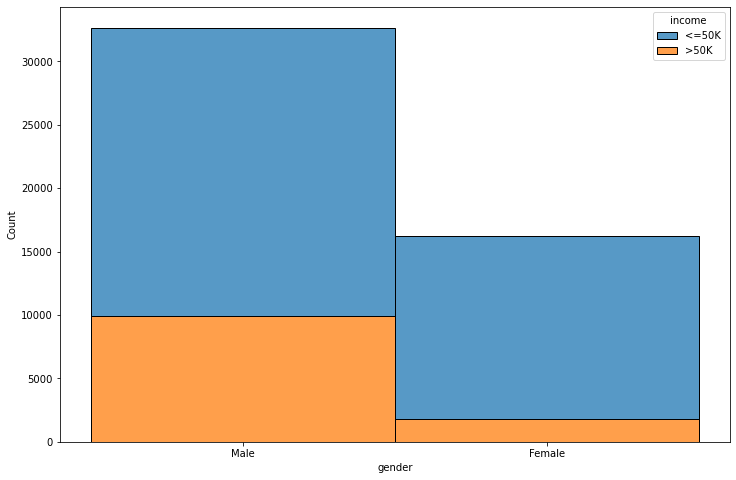

In [85]:
plt.figure(figsize=(12,8))
sns.histplot(data=data,x='gender',hue='income',stat="count", multiple="stack")

observations
- Most of the males have income <50k and same goes for females also.
- When the income is compered males with income <50k and >0k are greater then female

<AxesSubplot:xlabel='gender', ylabel='Count'>

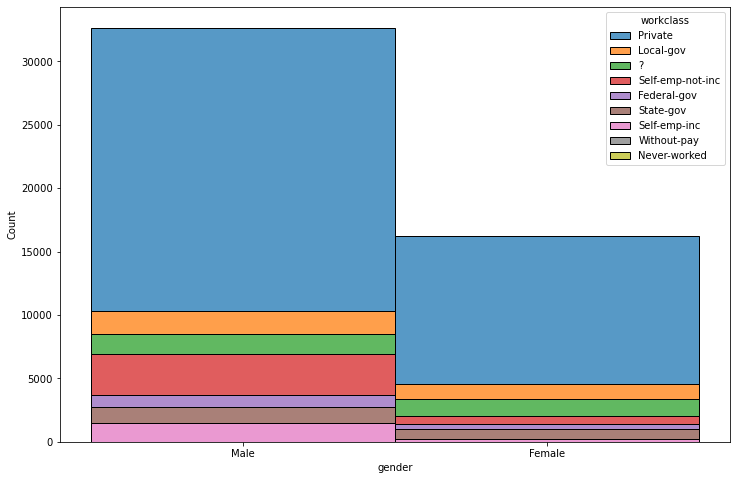

In [86]:
plt.figure(figsize=(12,8))
sns.histplot(data=data,x='gender',hue='workclass',stat="count", multiple="stack")

observaition
- Most of the people work in private work class

<AxesSubplot:xlabel='education', ylabel='Count'>

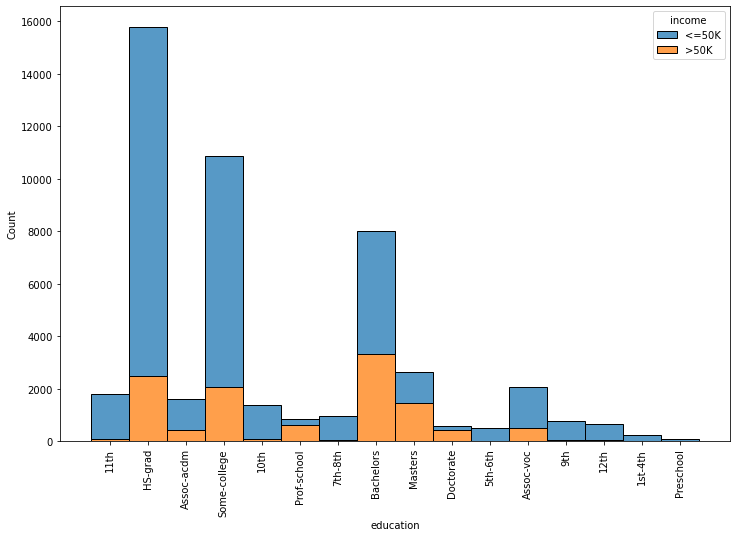

In [87]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.histplot(data=data,x='education',hue='income',stat="count", multiple="stack")

observation
- prople who have done there HS-grad,Bachelors and Masters have more frequency of income >50K when comapred to others.
- HS-grad,Bachelors abd Masters are getting the highest paying jobs

<AxesSubplot:xlabel='native-country', ylabel='Count'>

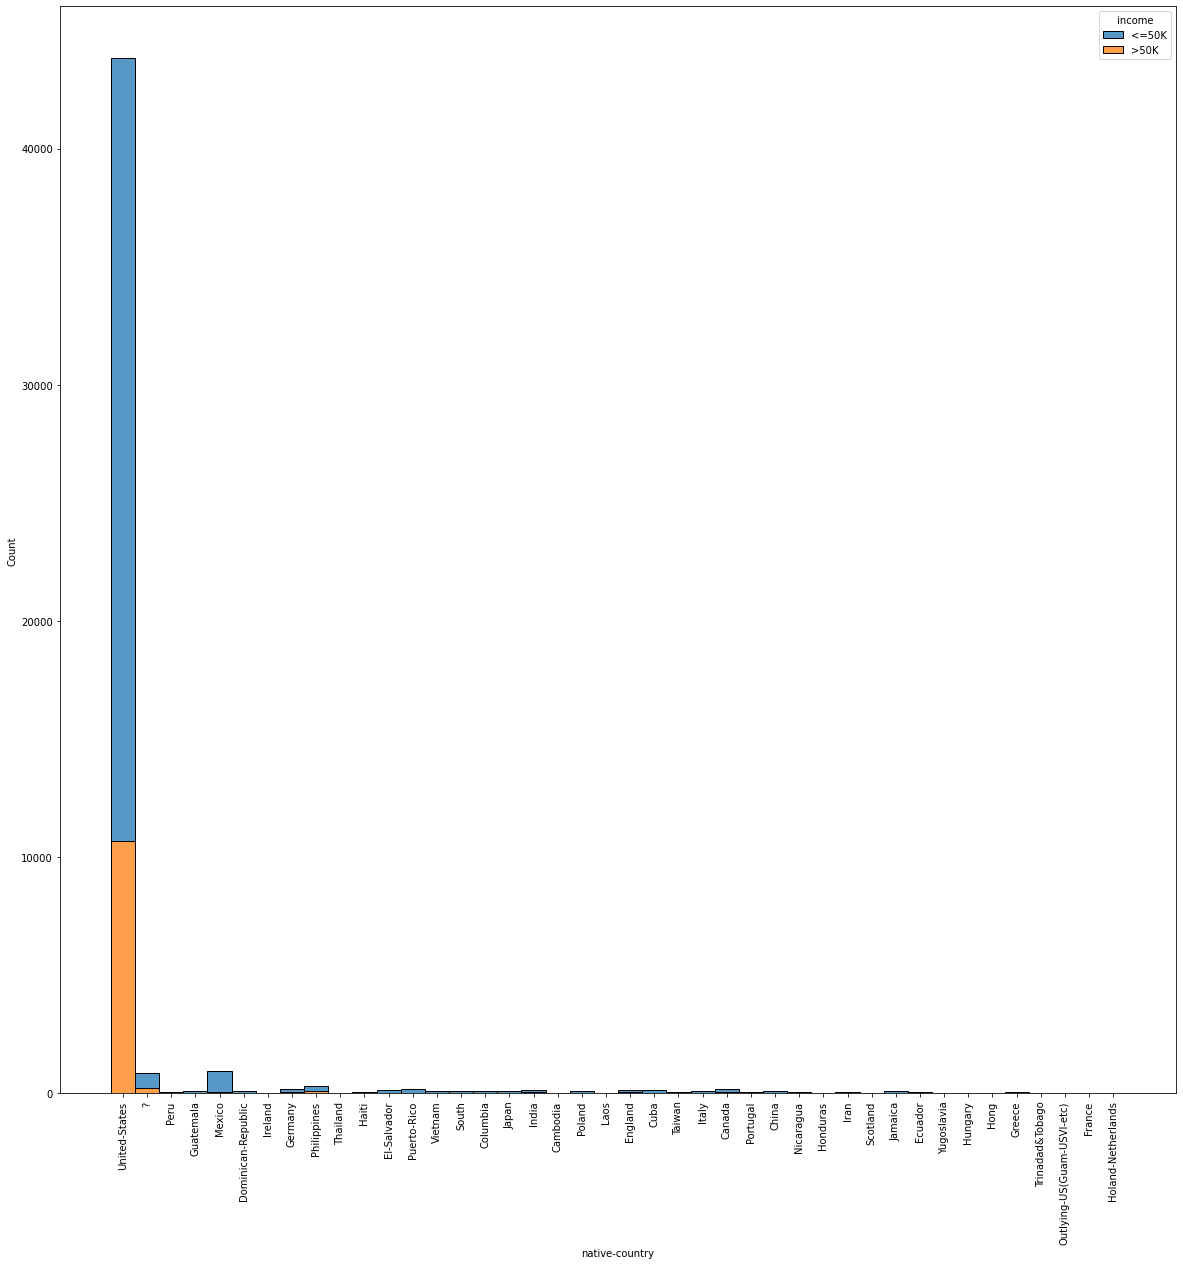

In [88]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.histplot(data=data,x='native-country',hue='income',stat="count", multiple="stack")

observations
- Most of the prople from united staes origin have income >50k

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

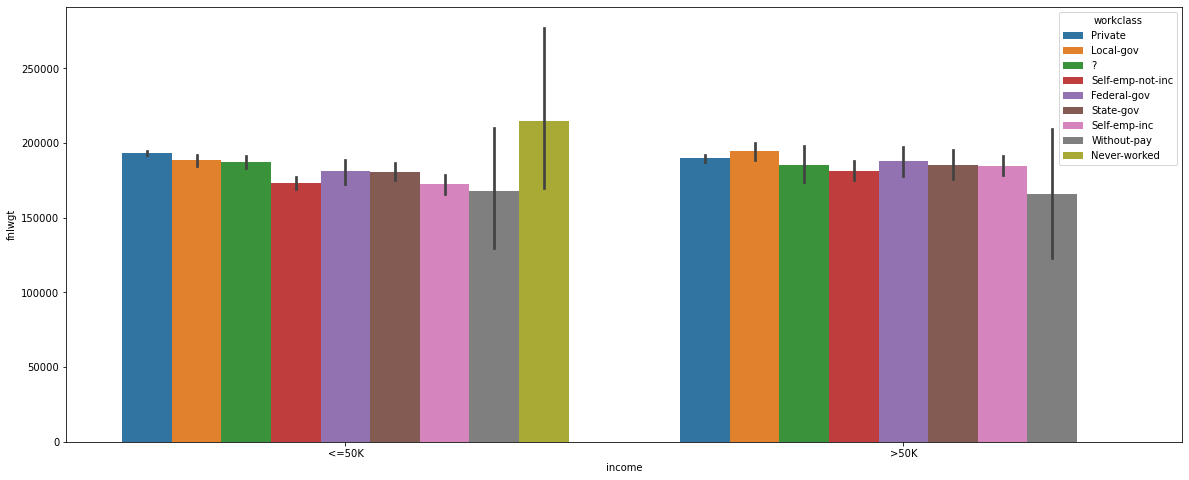

In [89]:
plt.figure(figsize=(20,8))
sns.barplot(x=data['income'],y=data['fnlwgt'],hue=data['workclass'])

<AxesSubplot:xlabel='income', ylabel='capital-gain'>

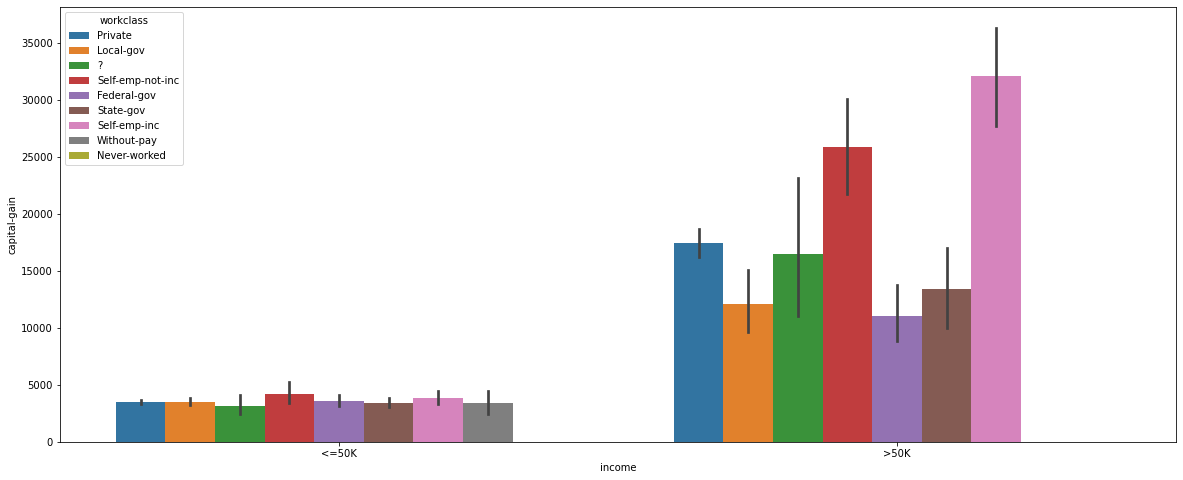

In [90]:
plt.figure(figsize=(20,8))
sns.barplot(x=data['income'],y=data[data['capital-gain']!=0]['capital-gain'],hue=data['workclass'])

<AxesSubplot:xlabel='income', ylabel='capital-loss'>

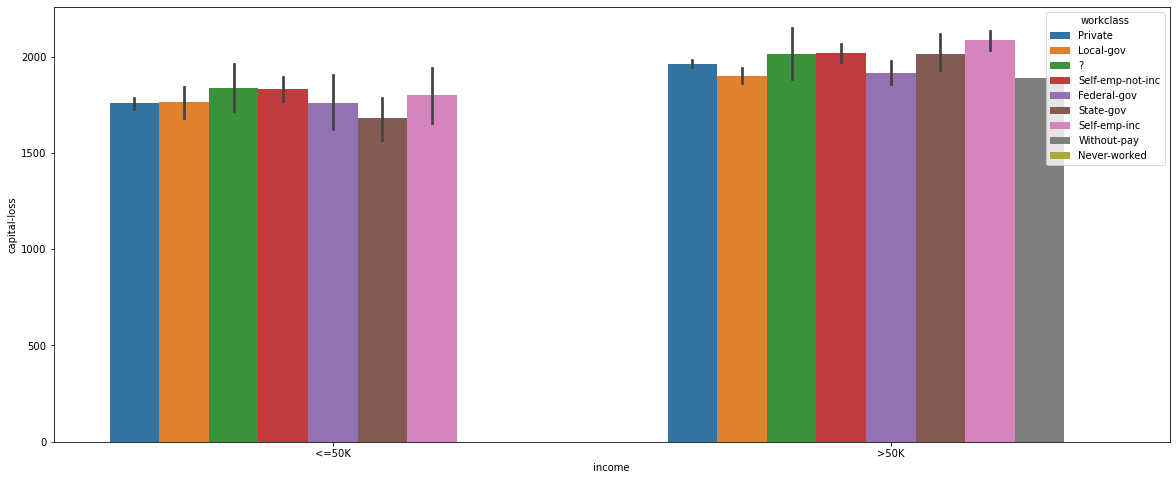

In [91]:
plt.figure(figsize=(20,8))
sns.barplot(x=data['income'],y=data[data['capital-loss']!=0]['capital-loss'],hue=data['workclass'])

observations
- People who work for others like private work calss have less capital gain/loss rather than ohters
- People who owns therir own company have more gains and losses.

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

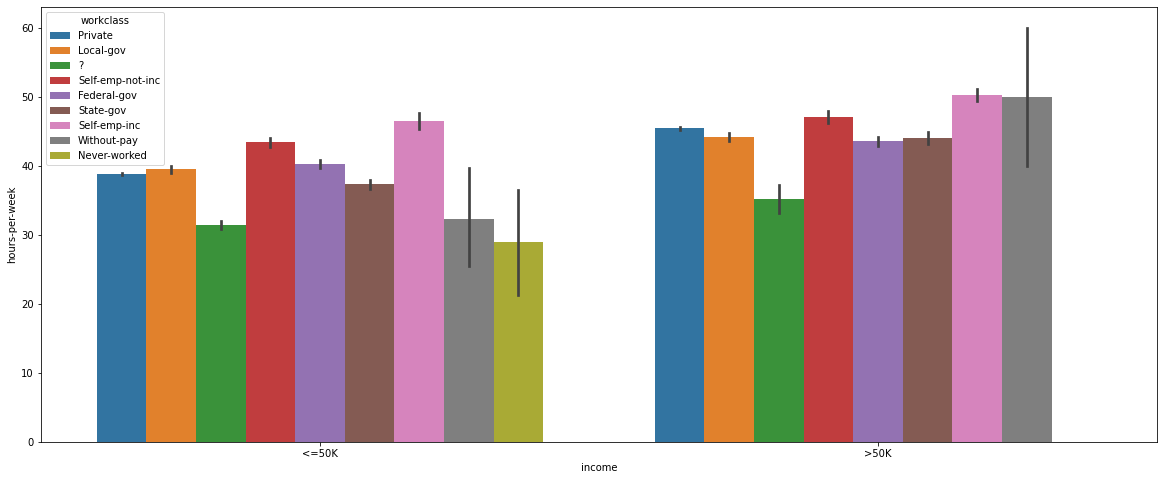

In [92]:
plt.figure(figsize=(20,8))
sns.barplot(x=data['income'],y=data['hours-per-week'],hue=data['workclass'])

observation
- people who are self employed work more hours per week than others.
- people who never worked and have incone >50k have leat work hours per week

**Correlation between Features and income**  
**Is there a relationship between Features and income?**    

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ Categorical\ Feature\ and\ income\ are\ correlated $$
Null Hypothesis (Status Quo): $$ H_0: \ Categorical Feature\ and\ income\ are\ not\ correlated $$

Step - 2:
Compute observed and expected values

Step - 3:
Compute Test Statistic: $$ \chi^2 = \sum\left(\frac{O_i-E_i}{E_i}\right)$$

Step - 4:
Decide $ \alpha $

Step - 5: Compute p-value
$$ if (p \ value < 0.05) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [93]:
categ_cols=['workclass', 'education', 'educational-num','marital-status', 'occupation', 'relationship',
            'race', 'gender', 'native-country',]
conti_cols=['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [94]:
for col in categ_cols:
    cont=pd.crosstab(data[col],data['income'])
    if chi2_contingency(cont)[1]<0.05:
        print(col,"and","income","are correlated",sep=" ")
    else:
        print(col,"and","income","are not correlated",sep=" ")

workclass and income are correlated
education and income are correlated
educational-num and income are correlated
marital-status and income are correlated
occupation and income are correlated
relationship and income are correlated
race and income are correlated
gender and income are correlated
native-country and income are correlated


In [95]:
for col in conti_cols:
    lis=pd.DataFrame(data.groupby('income'))
    li=[]
    for j in range(len(lis)):
        li.append(list(lis[1][j][col]))
    if f_oneway(*li)[1]>0.05:
        print(col,"and","Is_Lead","are not correlated",sep=" ") 
    else:
        print(col,"and","Is_Lead","are correlated",sep=" ")

age and Is_Lead are correlated
fnlwgt and Is_Lead are not correlated
capital-gain and Is_Lead are correlated
capital-loss and Is_Lead are correlated
hours-per-week and Is_Lead are correlated


observations 
- All features are related to income feature.

**Conclusion**
- All features are correlated to final outcome "income".
- Outliers are present in some features
- There are some missing values present in form of '?'

**Missing Value Analysis and Treatment**  

From above ovservation it can be seen that missing values are present in form of "?"

In [96]:
for col in conti_cols:
    print('Missing values in',col,data[col].isnull().sum(),sep=" ")

Missing values in age 0
Missing values in fnlwgt 0
Missing values in capital-gain 0
Missing values in capital-loss 0
Missing values in hours-per-week 0


In [97]:
for col in categ_cols:
    print('Missing values in',col,(data[col]=='?').sum(),sep=" ")

Missing values in workclass 2799
Missing values in education 0
Missing values in educational-num 0
Missing values in marital-status 0
Missing values in occupation 2809
Missing values in relationship 0
Missing values in race 0
Missing values in gender 0
Missing values in native-country 857


In [98]:
for col in categ_cols:
    print('Missing values percentage in',col,(data[col]=='?').sum()*100/data.shape[0],sep=" ")

Missing values percentage in workclass 5.730723557593874
Missing values percentage in education 0.0
Missing values percentage in educational-num 0.0
Missing values percentage in marital-status 0.0
Missing values percentage in occupation 5.751197739650301
Missing values percentage in relationship 0.0
Missing values percentage in race 0.0
Missing values percentage in gender 0.0
Missing values percentage in native-country 1.7546374022357807


observations
- Workclass has 2799 missing values and pecrtage of missing values is 5.73
- occupation has 2809 missing values and pecrtage of missing values is 5.17
- native country has 857  missing values and pecrtage of missing values is 1.75

Replacing '?' with Null value

In [99]:
for col in categ_cols:
    data[col].replace('?',np.nan,inplace=True)

educational-num and educations gives the same information so we can dorp any one of them. So droping education Feature. And relationship and marital status and relationship gives same information so we can remove one of them. Droping Relationship Feature.

In [100]:
data.drop(columns=['education','relationship'],inplace=True)

In [101]:
categ_cols=['workclass','marital-status', 'occupation', 'race', 'gender', 'native-country', 'income']

In [102]:
for col in categ_cols:
    data[col].fillna(data[col].mode(),inplace=True)

**Feature scaling and Encoding**

In [103]:
label=LabelEncoder()
for col in categ_cols:
    data[col]=label.fit_transform(data[col])

In [104]:
standard=StandardScaler()
data['fnlwgt']=standard.fit_transform(np.array(data['fnlwgt']).reshape(-1,1))

In [105]:
minmax=MinMaxScaler()
data['hours-per-week']=minmax.fit_transform(np.array(data['hours-per-week']).reshape(-1,1))

In [106]:
data['capital-gain']=minmax.fit_transform(np.array(data['capital-gain']).reshape(-1,1))

In [107]:
data['capital-loss']=minmax.fit_transform(np.array(data['capital-loss']).reshape(-1,1))

observations
- The data is Scaled and free from missing values

In [112]:
Y=data['income']
data.drop('income',inplace=True,axis=1)
X=data

**Models**

**Logestic Regression**

In [113]:
logreg = LogisticRegression()
log=logreg.fit(X,Y)
cross_val_score(log,X,Y, cv=5, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


0.8340117286150349

**Decision Tree**

In [114]:
dtc=DecisionTreeClassifier()
cross_val_score(dtc,X,Y, cv=5, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished


0.7499945452233205

**Random Forest**

In [115]:
rf=RandomForestClassifier()
cross_val_score(rf,X,Y, cv=5, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.0s finished


0.9075446256173343

**Gradient Boosting**

In [116]:
gb=GradientBoostingClassifier()
cross_val_score(gb,X,Y, cv=5, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.0s finished


0.9203766633133317

**XG Boosting**

In [121]:
xg=XGBClassifier()
cross_val_score(xg,X,Y, cv=5, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[15:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.5s finished


0.9273448332208497

**LGBM Classifier**

In [125]:
lgbm=LGBMClassifier()
cross_val_score(lgbm,X,Y, cv=5, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished


0.9283778631056936

**Train-Test Spliit**


In [140]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

**Logestic Regression**

In [141]:
logreg.fit(x_train,y_train)
logreg.score(x_test,y_test)

0.813798751151602

In [142]:
logreg.score(x_train,y_train)

0.8094848104829422

In [144]:
y_pred=logreg.predict(x_test)

In [146]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7479
           1       0.67      0.41      0.51      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.67      0.70      9769
weighted avg       0.80      0.81      0.80      9769



**Decision Tree**

In [148]:
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.8201453577643566

In [150]:
dtc.score(x_train,y_train)

0.999872034397154

In [151]:
y_pred=dtc.predict(x_test)

In [152]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7479
           1       0.61      0.64      0.63      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.75      9769
weighted avg       0.82      0.82      0.82      9769



**Random Forest**

In [155]:
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8613983007472618

In [156]:
rf.score(x_train,y_train)

0.9998464412765848

In [157]:
y_pred=rf.predict(x_test)

In [158]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.63      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



**Gradient Boosting**

In [159]:
gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.8722489507626164

In [160]:
gb.score(x_train,y_train)

0.8670437386430527

In [161]:
y_pred=gb.predict(x_test)

In [162]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7479
           1       0.80      0.61      0.69      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.81      9769
weighted avg       0.87      0.87      0.87      9769



**XG Boost**

In [163]:
xg.fit(x_train,y_train)
xg.score(x_test,y_test)

[17:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8746033370867028

In [164]:
xg.score(x_train,y_train)

0.8994702224042177

In [165]:
y_pred=xg.predict(x_test)

In [166]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.76      0.67      0.72      2290

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769



**LGBM**

In [167]:
lgbm.fit(x_train,y_train)
lgbm.score(x_test,y_test)

0.8779813696386529

In [168]:
lgbm.score(x_train,y_train)

0.8833977426867659

In [169]:
y_pred=lgbm.predict(x_test)

In [170]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.78      0.67      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769



**KNN**

In [175]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8105230832224384

In [176]:
knn.score(x_train,y_train)

0.8647147646712564

In [177]:
y_pred=knn.predict(x_test)

In [179]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7479
           1       0.61      0.55      0.58      2290

    accuracy                           0.81      9769
   macro avg       0.74      0.72      0.73      9769
weighted avg       0.80      0.81      0.81      9769



**Naive  bayes**

In [181]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)

0.8027433718906746

In [182]:
gnb.score(x_train,y_train)

0.7979423131062371

In [183]:
y_pred=gnb.predict(x_test)

In [184]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.67      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.75      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



**Extra Tree Classifier**

In [186]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc.score(x_test,y_test)

0.8493192752584706

In [187]:
etc.score(x_train,y_train)

0.999872034397154

In [188]:
y_pred=etc.predict(x_test)

In [189]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7479
           1       0.70      0.63      0.66      2290

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.85      9769



**AdaBoost Classifier**

In [192]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc.score(x_test,y_test)

0.8670283550005118

In [193]:
abc.score(x_train,y_train)

0.8602615616922171

In [194]:
y_pred=abc.predict(x_test)

In [195]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7479
           1       0.78      0.61      0.68      2290

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769



Observations

| Model | Train Accuracy | Test Accuracy |
|-------|----------------|---------------|
|Logestic Regression|0.8095|0.8138|
|Decision Tree classifier|0.9998|0.820|
|Random forest Classifier|0.998|0.861|
|Gradient Boosting Classifier|0.867|0.8722|
|XG-Boosting classifier|0.899|0.8746|
|LGBM Classifier|0.88|0.8779|
|KNN Classifier|0.86|0.81|
|Gausian Naive Bayes clasifier|0.79|.80|
|Extra tree classifier|0.999|0.8493|
|AdaBoost Classifier|0.8602|0.8670|